In [97]:
!pip install uproot awkward lz4 xxhash
!pip install iminuit
!pip install probfit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

In [99]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
tree=f["DecayTree"].arrays(library="np")

In [100]:
#defining useful classes and functions
class Daughter:
  def __init__(self, tree, number):
    self.PX=tree["H{}_PX".format(number)]
    self.PY=tree["H{}_PY".format(number)]
    self.PZ=tree["H{}_PZ".format(number)]
    self.PTOT=sqrt(square(self.PX)+square(self.PY)+square(self.PZ))#total momentum of the daughter particle
    self.ProbK=tree["H{}_ProbK".format(number)]
    self.ProbPi=tree["H{}_ProbPi".format(number)]

  def getTotalEnergy(self, mass):
    return  sqrt(square(self.PTOT)+mass**2)#total energy of the particle

def getDaughterParticles(tree):
  daughters=[]
  for i in range(1,4):
    daughters.append(Daughter(tree,i))
  return daughters

def totalMomentumMother(H1,H2,H3):
  return sqrt(square(H1.PX+H2.PX+H3.PX)+square(H1.PY+H2.PY+H3.PY)+square(H1.PZ+H2.PZ+H3.PZ))

def massMother(H1,H2,H3,mass):
  return sqrt(square(H1.getTotalEnergy(mass)+H2.getTotalEnergy(mass)+H3.getTotalEnergy(mass))-square(totalMomentumMother(H1,H2,H3)))

def asymmetry(Nplus, Nminus):
    return (Nminus-N_plus)/(Nminus+Nplus)

def deviation(Nplus, Nminus):
    return sqrt((1-asymmetry(Nplus, Nminus)**2)/(Nminus+Nplus))



In [101]:
#creating the istances for the three daughter particles
H1,H2,H3=getDaughterParticles(tree)


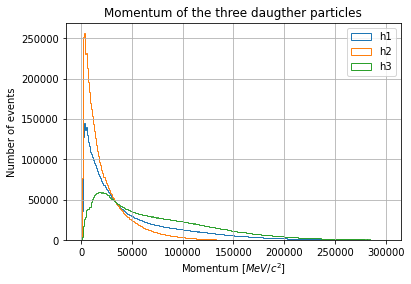

In [102]:
#plotting the hystogram
plt.hist(H1.PTOT,300,(0,300000),histtype='step',label='h1');
plt.hist(H2.PTOT,300,(0,300000),histtype='step',label='h2'); 
plt.hist(H3.PTOT,300,(0,300000),histtype='step',label='h3');  #the semicolon avoid printing the all array

plt.legend(loc='upper right');
plt.title("Momentum of the three daugther particles");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

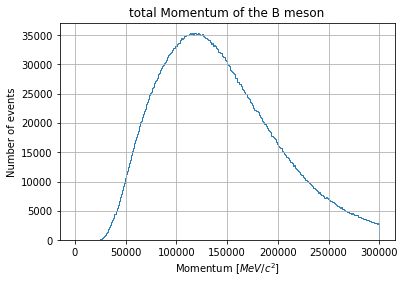

In [103]:
#Calculating the total momentum of the mother 
mother_ptot=totalMomentumMother(H1,H2,H3)


plt.hist(mother_ptot,300,(0,300000),histtype='step');

plt.title("total Momentum of the B meson");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

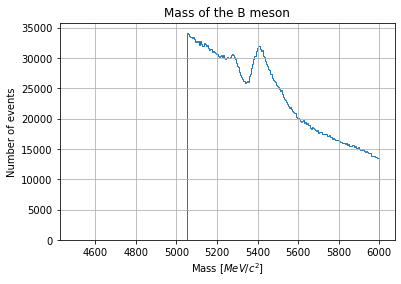

In [104]:
#total mass of the mother
massK=493.677
mass_mother=massMother(H1,H2,H3,massK)

plt.hist(mass_mother,300,(4500,6000),histtype='step');

plt.title("Mass of the B meson");
plt.xlabel('Mass [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

#Does this match what we would expect from theory?

**ADD HERE EXPLANATION**

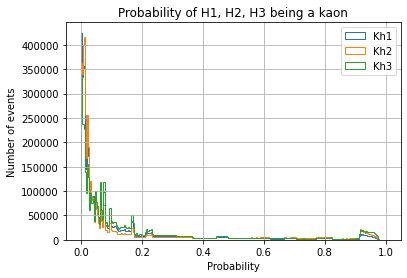

In [105]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(H1.ProbK,300,(0,1),histtype='step',label='Kh1');
plt.hist(H2.ProbK,300,(0,1),histtype='step',label='Kh2');
plt.hist(H3.ProbK,300,(0,1),histtype='step',label='Kh3');
plt.title("Probability of H1, H2, H3 being a kaon");
plt.xlabel('Probability');
plt.ylabel('Number of events');
plt.legend(loc='upper right');
plt.grid();

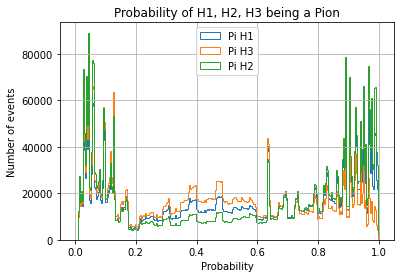

In [106]:
#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(H1.ProbPi,300,(0,1),histtype='step',label='Pi H1');
plt.hist(H3.ProbPi,300,(0,1),histtype='step',label='Pi H3');
plt.hist(H2.ProbPi,300,(0,1),histtype='step',label='Pi H2');
plt.legend(loc='upper center');
plt.title("Probability of H1, H2, H3 being a Pion");
plt.xlabel('Probability');
plt.ylabel('Number of events');
plt.grid();


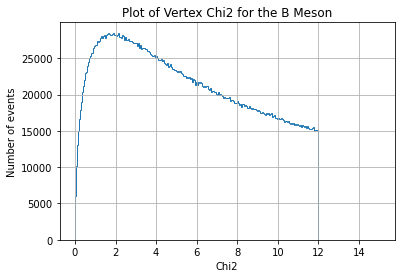

In [107]:
#make a plot of the B_VertexChi2
plt.hist(tree["B_VertexChi2"],300,(0,15),histtype='step',label='B vertex ki');

plt.xlabel('Chi2');
plt.ylabel('Number of events');
plt.title("Plot of Vertex Chi2 for the B Meson");
plt.grid();

In [108]:
#Making the selction
selection="(H1_ProbK>0.5) & (H2_ProbK>0.5) & (H3_ProbK>0.5) & (H1_ProbPi<0.15) & (H1_isMuon==0) & (H2_isMuon==0) &(H3_isMuon==0)& (H2_ProbPi<0.15) & (H3_ProbPi<0.15)"
cutTree=f["DecayTree"].arrays(library="np",cut=selection)



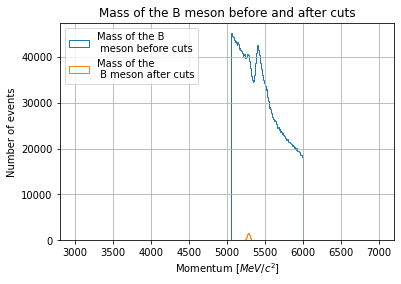

In [109]:
H1_cut,H2_cut,H3_cut=getDaughterParticles(cutTree)


mass_mother_cut=massMother(H1_cut,H2_cut,H3_cut,massK)

plt.hist(mass_mother,300,(4000,6000),histtype='step',label="Mass of the B \n meson before cuts");
plt.hist(mass_mother_cut,300,(3000,7000),histtype='step',label="Mass of the \n B meson after cuts");
plt.legend(loc='upper left');
plt.title("Mass of the B meson before and after cuts");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();


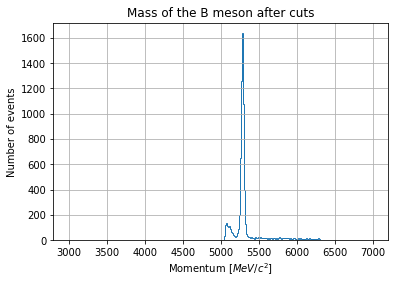

In [110]:
#mother cut alone

plt.hist(mass_mother_cut,300,(3000,7000),histtype='step');
plt.title("Mass of the B meson after cuts");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid()

#What do you notice about your histogram now?


**Add here explanation**


In [111]:
import iminuit
import probfit

<ipython-input-112-c8ab5153e2c4>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pdf=probfit.AddPdf(extended_gauss,extendend_exponential)
<ipython-input-112-c8ab5153e2c4>:16: InitialParamWarning: Parameter N does not have neither initial value nor limits.
  minuit = iminuit.Minuit(binned_likelihood, mean=mean(data),sd=std(data),lam=0.02)


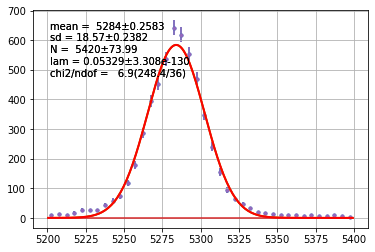

"\nFind a way to plot decentely the separate parts because they are all there (checked with Sanne's code)\nNot sure if addpdf is working\n"

In [112]:
data=array([m for m in mass_mother_cut if (m>5200) and (m<5400)])
def exponential(x,lam):
  return probfit.pdf.exponential(x,lam)
extendend_exponential=probfit.Extended(exponential)

def gaussian(x, mean, sd):
  return probfit.pdf.gaussian(x,mean=mean,sigma=sd)
extended_gauss=probfit.Extended(gaussian)

def crystal(x,alph,n, mu, sigma):
    return probfit.pdf.crystalball(x, alph, n, mu, sigma)

pdf=probfit.AddPdf(extended_gauss,extendend_exponential)

binned_likelihood = probfit.BinnedChi2(pdf, data,bound=(min(data),max(data)))
minuit = iminuit.Minuit(binned_likelihood, mean=mean(data),sd=std(data),lam=0.02)

minuit.migrad()
binned_likelihood.draw(minuit,parts=True);
binned_likelihood.show(minuit, parts=False);
'''
Find a way to plot decentely the separate parts because they are all there (checked with Sanne's code)
Not sure if addpdf is working
'''
    


In [113]:
print(pdf)
probfit.describe(pdf)

['x', 'mean', 'sd', 'N', 'lam']

**Counting**

In [115]:
totalCharge= "H1_Charge+H2_Charge+H3_Charge"
#filtering by charge
B_minus=f["DecayTree"].arrays(cut="({}==-1)&{}".format(totalCharge,selection), library="pd")#with numpy gives some errors
B_plus=f["DecayTree"].arrays(cut="({}==1)&{}".format(totalCharge,selection), library="pd")

#calculating the asimmetry
N_minus = len(B_minus)
N_plus = len(B_plus)

print("The deviation is:", deviation(N_minus,N_plus))
print("The Asymmetry is:", asymmetry(N_minus,N_plus))

The deviation is: 0.01147531731842736
The Asymmetry is: 0.0
